# Pharmacodynamics

Pharmacodynamics is the study of how a drug affects the body. It involves understanding the biochemical, physiological, and molecular effects of drugs, as well as the body's response to them. Pharmacodynamics focuses on receptor binding, post-receptor effects, and chemical interactions. This field helps to explain how drugs work, their mechanisms of action, their therapeutic effects, and any adverse effects they might cause.

In pharmacodynamics, key concepts include:

1. **Dose-response relationships**: This describes how a body's response changes based on the dose of the drug. The relationship is typically plotted on a graph to understand the point at which the drug's effects plateau, and increasing the dose would not necessarily increase the response but could increase the risk of adverse effects.
2. **Therapeutic window**: This is the dosage range in which a drug is expected to be effective without causing unacceptable side effects. It's a balance between efficacy and toxicity.
3. **Receptors**: These are typically proteins in the body to which a drug binds to exert its effects. Drug-receptor interaction can stimulate (agonists) or block (antagonists) a physiological response.
4. **Pharmacological effect**: This refers to the specific biochemical interaction through which a drug substance produces its pharmacological effect.
5. **Drug potency and efficacy**: Potency refers to the amount of drug needed to produce an effect, while efficacy refers to the maximum effect a drug can produce.

Pharmacodynamics, along with pharmacokinetics (how the body processes the drug), forms the basis for the development, therapeutic use, and understanding of drugs.

## Dose response relationship
Pharmacodynamics describes what a drug does to the body, and the dose-response relationship is a key aspect of this. The dose-response relationship, in basic terms, describes how the effect of a drug changes as its dose changes.

Here are the key points related to the dose-response relationship:

1. **Graded Dose-Response**: In this type of relationship, as the dose of a drug increases, the individual subject's response to the drug also increases until a maximum effect (Emax) is reached. At this point, increasing the dose further will not enhance the effect. This curve is often used to understand the drug's potency (amount of drug needed to produce a particular effect) and efficacy (maximum effect a drug can produce).
2. **Quantal Dose-Response**: This type of relationship looks at the percentage of a population that responds to a certain dose of a drug rather than the intensity of an individual’s response. It's typically used to determine the median effective dose (ED50, the dose that produces the desired effect in 50% of the population), median toxic dose (TD50, the dose that is toxic in 50% of the population), and median lethal dose (LD50, the dose that is lethal in 50% of the population). These values are used in determining a drug's therapeutic index or safety margin.
3. **Threshold Dose**: This is the minimum dose of a drug that produces a measurable response. Below this dose, no significant effect is observed.
4. **Plateau or Saturation Point**: After a certain dose, increasing the quantity of the drug does not increase the therapeutic effect. This level is known as the plateau or saturation point, and it is here that the drug reaches its maximum efficacy.
5. **Drug Receptors and Binding**: The dose-response relationship also hinges on the interaction between the drug and its receptor. Drugs bind to receptors to produce their effects, and the binding is often reversible. The degree to which a drug activates a response when it binds to a receptor is called intrinsic activity.
6. **Agonists and Antagonists**: Drugs that bind to receptors and stimulate a response are called agonists. Those that prevent or dampen the receptor's response are called antagonists. Understanding how agonists and antagonists work helps in understanding the dose-response relationship.
7. **Inter-individual Variability**: There can be significant variability in dose-response relationships between different individuals due to factors such as genetics, age, gender, disease state, and the presence of other drugs. 

These points highlight how the dose of the drug and the body's response to the drug are interconnected, and understanding this relationship is crucial in therapeutic drug use and development.

First we will study the dose response relationship based on the following equation

\begin{equation}
E = E_{max} \cdot \frac{C^{\gamma}}{E_{50}^{\gamma} + C^{\gamma}}
\end{equation}

with $E_{max}$ being the maximum effect or efficacy, $C$ being the concentration at the site of action, and $E_{50}$ being the dose required to produce 50% of the maximum effect, and $\gamma$ being the steepness factor of the sigmoidal curve.

![Dose response](10_pharmacodynamics_dose_response.png)

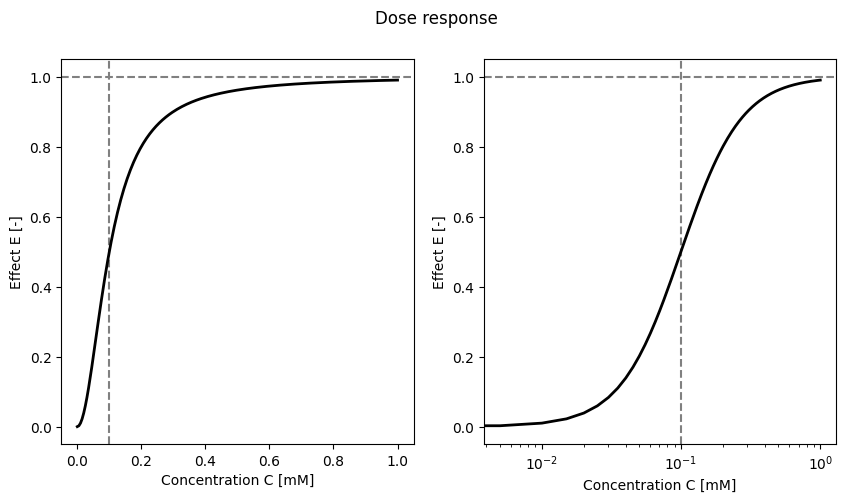

In [1]:
import numpy as np
from matplotlib import pyplot as plt

E50 = 0.1  # [mM]
Emax = 1.0  # [-] arbitrary effect units
gamma = 2
C = np.linspace(0, 1, num=200)  # [mM]
E = Emax * C**gamma/(E50**gamma + C**gamma)  # [-]

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
f.suptitle("Dose response")
for ax in (ax1, ax2):
    ax.axhline(y=Emax, color="grey", linestyle="--")
    ax.axvline(x=E50, color="grey", linestyle="--")
    ax.plot(C, E, color="black", linewidth=2.0)
    ax.set_xlabel("Concentration C [mM]")
    ax.set_ylabel("Effect E [-]")
    
    
ax2.set_xscale("log")
plt.show()

Parameter scan to study the effect of potency E50

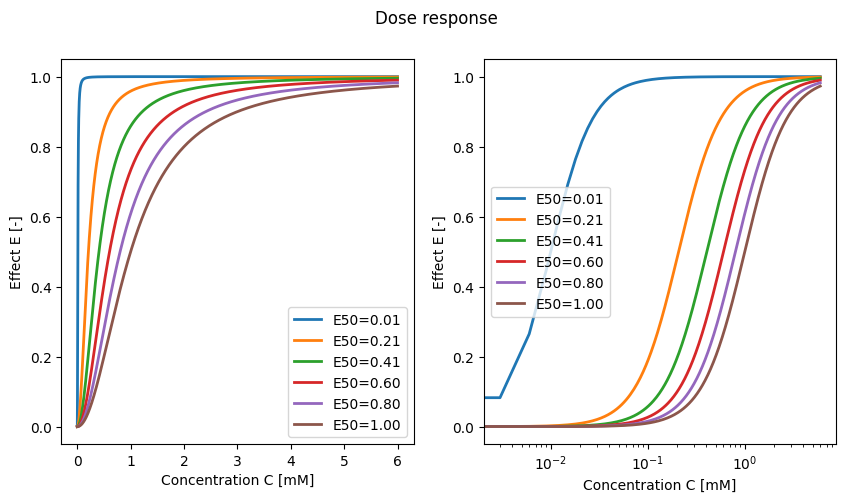

In [2]:
E50 = 0.1  # [mM]
Emax = 1.0  # [-] arbitrary effect units
gamma = 2
C = np.linspace(0, 6, num=2000)  # [mM]

E50s = np.linspace(0.01, 1.0, num=6)

E = Emax * C**gamma/(E50**gamma + C**gamma)  # [-]

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
f.suptitle("Dose response")
for ax in (ax1, ax2):    
    for E50 in E50s:
        E = Emax * C**gamma/(E50**gamma + C**gamma)  # [-]
        ax.plot(C, E, linewidth=2.0, label=f"{E50=:.2f}")
    
    ax.set_xlabel("Concentration C [mM]")
    ax.set_ylabel("Effect E [-]")
    ax.legend()
    
    
ax2.set_xscale("log")
plt.show()

**Exercise**: Analyse the dependency of the Effect `E` on the efficacy `Emax` and steepness `gamma`. I.e. perform a parameter scan similar to the potency `E50`.

## Pharmacokinetics/pharmacodynamics (PK/PD)
Next we are interested in combining a pharmacokinetics model (concentration timecourse) with a pharmacodynamic model of the drug to be able to describe the effect of the drug.

![Pharmacokinetics and pharmacodynamics](10_pharmacodynamics_pkpd.png)

We will couple the model of absorption and elimination to a model pharmacodynamic model describing the desired effect `E` and the side effect `S`.

![PK/PD model](10_pharmacodynamics_model.png)

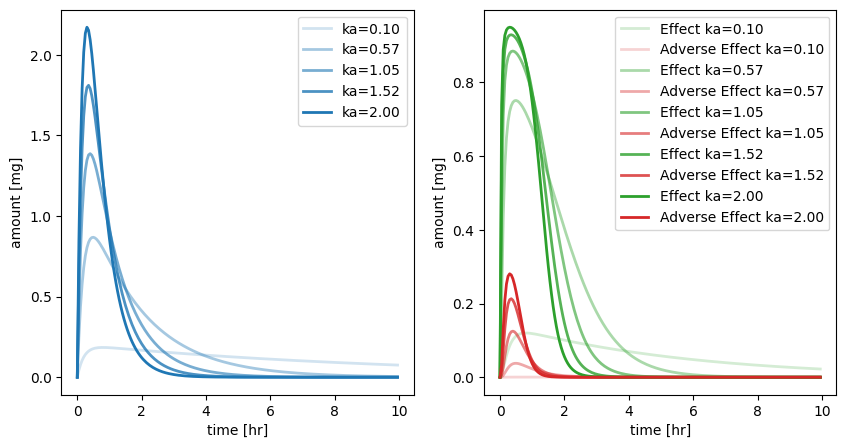

In [3]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from matplotlib import pylab as plt


def dxdt_absorption_first_order(x, t, ka, ke):
    """
    ODEs 
    """
    # state variables
    A_tablet = x[0]  # [mg]
    A_central = x[1] # [mg/l]
    A_urine = x[2] # [mg]
    
    # rates
    va = ka * A_tablet  # [mg/hr]
    ve = ke * A_central # [mg/hr]

    # odes (stoichiometric equation)    
    return [
        -va,            # dA_tablet/dt  [mg/hr]
         va - ve,       # dA_central/dt [mg/hr]
         ve,            # dA_urine/dt  [mg/hr]
    ] 


# initial condition and time span
t = np.arange(0, 10, 0.05) # [hr]
Dose_A = 10.0  # [mg]
x0 = [
    Dose_A,  # A_tablet  [mg]
    0.0,   # A_central [mg]
    0.0,   # A_urine [mg]
]

# parameters of pharmacokinetics model
ka = 2.0  # [1/hr]
ke = 5.0  # [1/hr]

# parameters of pharmacodynamics model
# effect
E50 = 0.5  # [mg]
Emax = 1.0  # [-] arbitrary effect units
Egamma = 2

# adverse effect
S50 = 2.0  # [mg]
Smax = 0.5  # [-] arbitrary effect units
Sgamma = 3

x = odeint(dxdt_absorption_first_order, x0, t, args=(ka, ke))

n_samples = 5
kas = np.linspace(0.1, 2.0, num=n_samples)  # [1/hr]
tcs = []
pks = []

# simulate all the different absorption
for kp, ka in enumerate(kas):
    x = odeint(dxdt_absorption_first_order, x0, t, args=(ka, ke))
    df = pd.DataFrame(x, columns=["A_tablet", "A_central", "A_urine"])
    df["time"] = t
    # calculate effect
    df["E"] = Emax * df.A_central**Egamma/(E50**Egamma + df.A_central**Egamma)
    # calculate side effect
    df["S"] = Smax * df.A_central**Sgamma/(S50**Sgamma + df.A_central**Sgamma)
    tcs.append(df)
    
# plot timecourse
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))    

for k, ka in enumerate(kas):
    tc = tcs[k]
    ax1.plot(
        tc.time, tc.A_central, linewidth=2, color="tab:blue", 
        alpha=(k+1)/n_samples, label=f"{ka=:.2f}"
    )
    ax2.plot(
        tc.time, tc.E, linewidth=2, color="tab:green", 
        alpha=(k+1)/n_samples, label=f"Effect {ka=:.2f}"
    )
    ax2.plot(
        tc.time, tc.S, linewidth=2, color="tab:red", 
        alpha=(k+1)/n_samples, label=f"Adverse Effect {ka=:.2f}"
    )
for ax in (ax1, ax2):
    ax.set_xlabel("time [hr]")
    ax.set_ylabel("amount [mg]")
    ax.legend()
    
plt.show()